Create an image captioning dataset with at least 2000 images. All of images and captions should be yours yourself (Even different from your groupmates). Send me both of your codes and data files. Good luck.

In [ ]:
!pip install selenium
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium import webdriver
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)

     |████████████████████████████████| 911kB 2.8MB/s 
Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Get:6 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Get:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release [564 B]
Get:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release.gpg [833 B]
Hit:9 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:11 https://cloud.r-project.org/bin/linux/ubuntu bion

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: use options instead of chrome_options
  if sys.path[0] == '':


In [ ]:
wd.get('http://www.syllablecount.com/syllables/words/nouns.aspx')
captions=[]
for row in range(1,667):
  for column in range(1,4):
    caption=wd.find_element_by_css_selector('#ctl00_ContentPane_DataList3 > tbody > tr:nth-child('+str(row)+') > td:nth-child('+str(column)+') > a').text
    captions.append(caption)

Scraping of words takes 2 minutes

In [ ]:
captions[:10]

['time',
 'year',
 'people',
 'way',
 'Man',
 'Day',
 'thing',
 'child',
 'Mr',
 'government']

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)
images=[]
for caption in captions:
  wd.get('https://www.picsearch.com/index.cgi?q='+caption)
  image=WebDriverWait(wd,5).until(EC.presence_of_element_located((By.XPATH,'/html/body/div[2]/div[2]/div[3]/span[3]/a/img'))).get_attribute('src')
  images.append(image)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: use options instead of chrome_options
  """


TAKES 20 MINUTES TO SCRAPE

In [ ]:
import pandas as pd
d={'image':images,'caption':captions}
image_caption_dataset_link_version=pd.DataFrame(data=d)

In [ ]:
image_caption_dataset_link_version.shape

(1998, 2)

LETS ADD 2 MORE IMAGES AND WE ARE DONE!

In [ ]:
wd=webdriver.Chrome('chromedriver',chrome_options=chrome_options)
wd.get('https://www.google.com/search?q=abdulla+isayev&rlz=1C1GCEA_enAZ846AZ846&sxsrf=ALeKk00HuX56f5H5-m62jkpm0RZobKkaYw:1599232334318&source=lnms&tbm=isch&sa=X&ved=2ahUKEwiB1szZ5M_rAhUDURUIHZxuB5EQ_AUoAXoECBYQAw&biw=1536&bih=754')
image=WebDriverWait(wd,5).until(EC.presence_of_element_located((By.XPATH,'/html/body/div[2]/c-wiz/div[3]/div[1]/div/div/div/div/div[1]/div[1]/div[4]/a[1]/div[1]/img'))).get_attribute('src')
caption='I am very rich!'
captions.append(caption)
images.append(image)
wd.get('http://smalek.22web.org/?i=1')
image=WebDriverWait(wd,5).until(EC.presence_of_element_located((By.XPATH,'/html/body/div[1]/div[3]/div[1]/div/div[1]/div[2]/a/img'))).get_attribute('src')
caption='Thinking to you!'
captions.append(caption)
images.append(image)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: use options instead of chrome_options
  """Entry point for launching an IPython kernel.


In [ ]:
d={'image':images,'caption':captions}
image_caption_dataset_link_version=pd.DataFrame(data=d)

In [ ]:
image_caption_dataset_link_version.to_excel('image_caption_dataset_link_version.xlsx')

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import urllib

In [ ]:
def show_the_image_and_caption(index):
  url=images[index]
  print(captions[index])
  im=Image.open(urllib.request.urlopen(url))
  plt.imshow(im)
  plt.show()

Thinking to you!


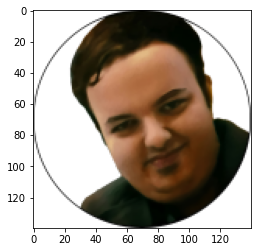

In [ ]:
show_the_image_and_caption(1999)

plan


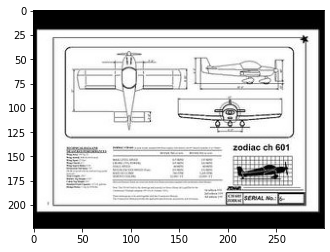

In [ ]:
show_the_image_and_caption(150)

I am very rich!


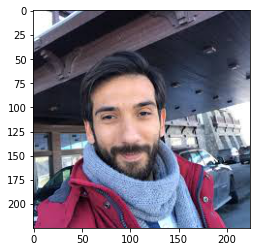

In [ ]:
show_the_image_and_caption(1998)

In [ ]:
unique_images=set(images)
len(unique_images)

1996

some links are duplicated.Lets see which images

In [ ]:
from collections import Counter
non_unique_images=[k for (k,v) in Counter(images).items() if v > 1]

In [ ]:
non_unique_images

['https://media5.picsearch.com/is?RiPUc8Oiza-9RPlTt78DiA9fmZf7nmLAVTSuAYR_hqg&height=213',
 'https://media3.picsearch.com/is?gFI3RXR2W9fZu3gESp2MRXZTKG8el684tfJfKKCm8R4&height=224',
 'https://media5.picsearch.com/is?O2_20wR5USryPeAz9iTBT31O4-x4g0h0L8Px1tbLnfo&height=191',
 'https://media4.picsearch.com/is?pDIWYj_fy9FBRLOYEDSjNoKkhub_x1d8f9xolAyfl5o&height=224']

In [ ]:
for i in range(len(images)):
  for image in non_unique_images:
    if images[i]==image:
      print(str(images[i])+" index is "+str(i))


https://media5.picsearch.com/is?RiPUc8Oiza-9RPlTt78DiA9fmZf7nmLAVTSuAYR_hqg&height=213 index is 62
https://media3.picsearch.com/is?gFI3RXR2W9fZu3gESp2MRXZTKG8el684tfJfKKCm8R4&height=224 index is 486
https://media5.picsearch.com/is?O2_20wR5USryPeAz9iTBT31O4-x4g0h0L8Px1tbLnfo&height=191 index is 629
https://media5.picsearch.com/is?RiPUc8Oiza-9RPlTt78DiA9fmZf7nmLAVTSuAYR_hqg&height=213 index is 910
https://media4.picsearch.com/is?pDIWYj_fy9FBRLOYEDSjNoKkhub_x1d8f9xolAyfl5o&height=224 index is 1388
https://media5.picsearch.com/is?O2_20wR5USryPeAz9iTBT31O4-x4g0h0L8Px1tbLnfo&height=191 index is 1523
https://media4.picsearch.com/is?pDIWYj_fy9FBRLOYEDSjNoKkhub_x1d8f9xolAyfl5o&height=224 index is 1597
https://media3.picsearch.com/is?gFI3RXR2W9fZu3gESp2MRXZTKG8el684tfJfKKCm8R4&height=224 index is 1823


effect


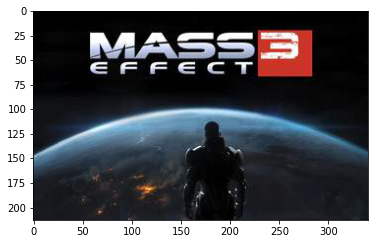

Mass


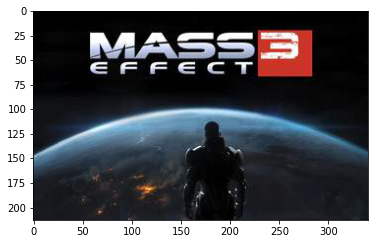

In [ ]:
show_the_image_and_caption(62)
show_the_image_and_caption(910)

injury


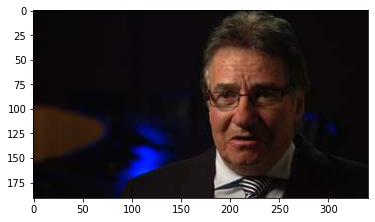

jury


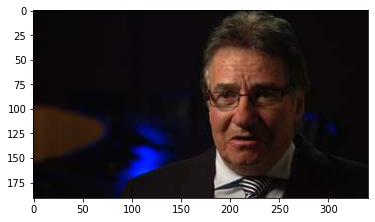

In [ ]:
show_the_image_and_caption(629)
show_the_image_and_caption(1523)

tunnel


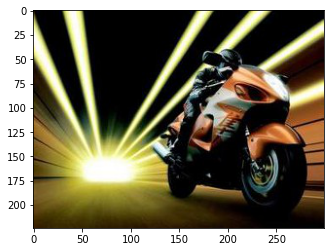

bike


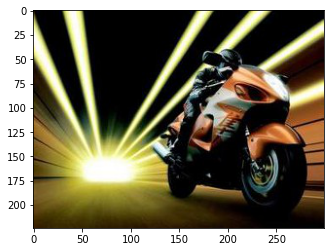

In [ ]:
show_the_image_and_caption(1388)
show_the_image_and_caption(1597)

These non-unique photos have similar  captions in grammatical or semantical view,so thats why it was hard for search engine to distinguish them